In [31]:
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('2018.csv')

df.dropna(
    axis = 0,
    how='all',
    subset=None,
    inplace=True
)

df = df.drop_duplicates()


In [32]:
# dropping all cancelled flights
df = df[(df['CANCELLED'] == 0)]
filtered_df = df
df.tail()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
7213441,2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,...,100.0,99.0,72.0,331.0,NaN,NaN,NaN,NaN,NaN,NaN
7213442,2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,...,181.0,176.0,148.0,936.0,NaN,NaN,NaN,NaN,NaN,NaN
7213443,2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,...,112.0,128.0,88.0,511.0,NaN,NaN,NaN,NaN,NaN,NaN
7213444,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,...,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
7213445,2018-12-31,AA,1818,RDU,CLT,1435,1443.0,8.0,8.0,1451.0,...,71.0,59.0,44.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# getting unique airlines
df.OP_CARRIER.unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [34]:
# group by airline
airline_groups = df.groupby('OP_CARRIER')

In [35]:
# calculates departure delay means for each airline
departure_means = airline_groups['DEP_DELAY'].mean()
normalized_departure = (df['DEP_DELAY'] - df['DEP_DELAY'].mean()) / df['DEP_DELAY'].std()
print(normalized_departure)

0         -0.333839
1         -0.400870
2         -0.333839
3         -0.088060
4          0.224750
             ...   
7213441   -0.311496
7213442   -0.088060
7213443   -0.333839
7213444    0.291780
7213445   -0.043373
Name: DEP_DELAY, Length: 7096862, dtype: float64


In [36]:
# calculates arrival delay means for each airline
arrival_means = airline_groups['ARR_DELAY'].mean()
normalized_arrival = (df['ARR_DELAY'] - df['ARR_DELAY'].mean()) / df['ARR_DELAY'].std()
print(normalized_arrival)

0         -0.597711
1         -0.619021
2         -0.384613
3         -0.150204
4          0.190753
             ...   
7213441   -0.214134
7213442   -0.086275
7213443    0.126824
7213444    0.190753
7213445   -0.192824
Name: ARR_DELAY, Length: 7096862, dtype: float64


In [37]:
df.ORIGIN.unique()

array(['EWR', 'LAS', 'SNA', 'RSW', 'ORD', 'IAH', 'DEN', 'SMF', 'RIC',
       'PDX', 'MCO', 'TYS', 'SFO', 'JAC', 'BOS', 'MSY', 'MIA', 'SEA',
       'SAT', 'SLC', 'RDU', 'FLL', 'IAD', 'DFW', 'ANC', 'MSP', 'ALB',
       'LAX', 'IND', 'SAN', 'BNA', 'BDL', 'ABQ', 'SAV', 'PHX', 'AUS',
       'PHL', 'SJC', 'ORF', 'DCA', 'LGA', 'BWI', 'PIT', 'OGG', 'CLE',
       'TPA', 'MYR', 'ROC', 'SJU', 'EGE', 'HNL', 'ONT', 'PBI', 'MKE',
       'HDN', 'JAX', 'OKC', 'ATL', 'SRQ', 'BZN', 'EUG', 'BOI', 'RNO',
       'GEG', 'TUS', 'LIH', 'KOA', 'ITO', 'PSP', 'DTW', 'GUC', 'OMA',
       'MTJ', 'CLT', 'CHS', 'MCI', 'BIL', 'CVG', 'CID', 'MEM', 'AVL',
       'BUF', 'GUM', 'JFK', 'ADQ', 'BET', 'SCC', 'BRW', 'FAI', 'JNU',
       'KTN', 'SIT', 'PSG', 'OME', 'OTZ', 'BUR', 'OAK', 'BLI', 'SBA',
       'STL', 'GFK', 'SYR', 'GSP', 'FSD', 'DSM', 'ILM', 'PWM', 'BIS',
       'JAN', 'GRB', 'OAJ', 'BTV', 'TLH', 'LAN', 'MSN', 'BMI', 'BGR',
       'ABY', 'MOT', 'DHN', 'LEX', 'MDT', 'CMH', 'FSM', 'HSV', 'FAR',
       'BQK', 'GSO',

In [38]:
origin_groups = df.groupby('ORIGIN')
departure_means_Origin = origin_groups['DEP_DELAY'].mean()
print(departure_means_Origin)

ORIGIN
ABE    11.935737
ABI     8.027259
ABQ     8.636986
ABR     7.742198
ABY    15.052261
         ...    
WYS    -2.485356
XNA    10.865010
YAK    -8.720506
YNG    63.000000
YUM    -0.455669
Name: DEP_DELAY, Length: 358, dtype: float64


In [39]:
arrival_means_origin = origin_groups['ARR_DELAY'].mean()
print(arrival_means_origin)

ORIGIN
ABE     8.172159
ABI     6.535354
ABQ     3.650303
ABR     4.835598
ABY    15.087525
         ...    
WYS    -0.179916
XNA     7.273438
YAK    -7.207334
YNG    75.000000
YUM    -5.234738
Name: ARR_DELAY, Length: 358, dtype: float64


In [40]:
df_airline_origin = pd.DataFrame({'airline': df['OP_CARRIER'], 'origin': df['ORIGIN']})

In [41]:
correlation_data =  airline_groups
corr = correlation_data.corr()
print(corr)

                                OP_CARRIER_FL_NUM  CRS_DEP_TIME  DEP_TIME  \
OP_CARRIER                                                                  
9E         OP_CARRIER_FL_NUM             1.000000      0.002329  0.001350   
           CRS_DEP_TIME                  0.002329      1.000000  0.970934   
           DEP_TIME                      0.001350      0.970934  1.000000   
           DEP_DELAY                     0.001431      0.094869  0.125769   
           TAXI_OUT                      0.020562      0.057060  0.066699   
...                                           ...           ...       ...   
YX         WEATHER_DELAY                 0.005410     -0.006625 -0.021852   
           NAS_DELAY                    -0.013278     -0.042551 -0.020120   
           SECURITY_DELAY                0.007153     -0.016087 -0.011166   
           LATE_AIRCRAFT_DELAY          -0.011683      0.143341  0.178895   
           Unnamed: 27                        NaN           NaN       NaN   

<ipython-input-41-c50b7de9adcf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr = correlation_data.corr()


In [42]:
# switching minutes to hours
filtered_df['ARR_DELAY'] = filtered_df['ARR_DELAY'] / 60
filtered_df['DEP_DELAY'] = filtered_df['DEP_DELAY'] / 60
pd.to_datetime(filtered_df.FL_DATE)

0         2018-01-01
1         2018-01-01
2         2018-01-01
3         2018-01-01
4         2018-01-01
             ...    
7213441   2018-12-31
7213442   2018-12-31
7213443   2018-12-31
7213444   2018-12-31
7213445   2018-12-31
Name: FL_DATE, Length: 7096862, dtype: datetime64[ns]

In [43]:
# month variable
filtered_df['FL_DATE_month'] = pd.to_datetime(filtered_df['FL_DATE']).dt.month

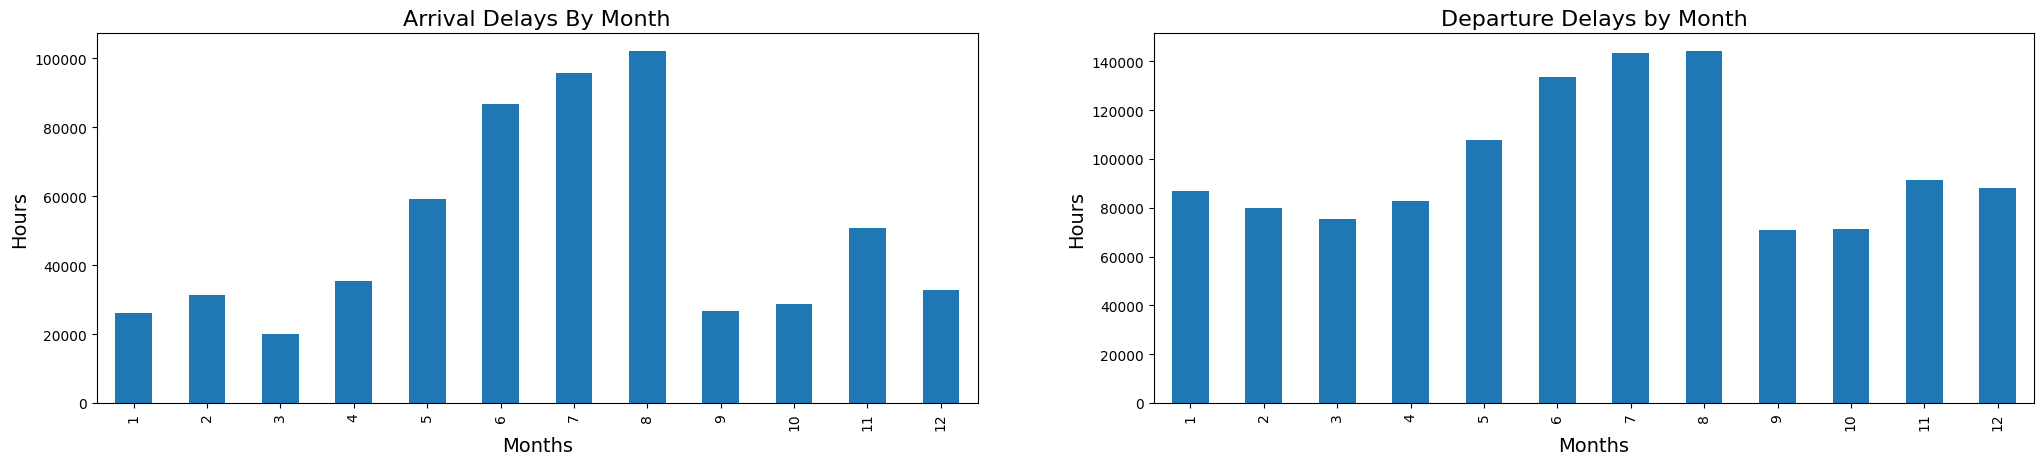

In [44]:
# arrival and departure delays by month of the year
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)
plt.subplot(2, 2 ,1)
filtered_df.groupby('FL_DATE_month').ARR_DELAY.sum().plot.bar().set_title('Arrival Delays by Month')
plt.title('Arrival Delays By Month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Months', fontsize=14)
plt.subplot(2, 2 ,2)
filtered_df.groupby('FL_DATE_month').DEP_DELAY.sum().plot.bar()
plt.title('Departure Delays by Month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Months', fontsize=14)
plt.show()